<a href="https://colab.research.google.com/github/GreggRodgers02/Colab_notebooks/blob/main/LLM_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LLM Lesson**

## Setting up the API

In [ ]:
import openai
from openai import OpenAI
from getpass import getpass
import os

In [ ]:
OPENAI_API_KEY = getpass("OPENAI_API_KEY")

OPENAI_API_KEY··········


## Generating Text

In [ ]:
_openai = OpenAI(api_key=OPENAI_API_KEY)

def generate_text(prompt):
  response = _openai.completions.create(
      model="davinci-002",
      prompt=prompt,
      max_tokens=10,
      temperature=0.5
  )
  return response.choices[0].text.strip()

In [ ]:
prompt = "Once upon a time"

In [ ]:
generate_text = generate_text(prompt)
generate_text

', in a land far far away, there was'

## Customizing the Output

In [ ]:
def generate_text(prompt, max_tokens):
    response = _openai.completions.create(
        model="davinci-002",
        prompt=prompt,
        max_tokens=max_tokens,
        temperature=0.5
    )
    return response.choices[0].text.strip()

prompt = "Once upon a time"
generated_text_output = generate_text(prompt=prompt, max_tokens=50)
generated_text_output


', there was a king who had a son. The king was so proud of his son that he crowned him the prince of his kingdom. The prince was so happy that he felt like he was the luckiest person alive. He had everything he could'

## Chatbot

In [ ]:
def poetic_chatbot(prompt):
  response = _openai.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[
          {
              "role": "system",
              "content": "You are a poetic chatbot, skilled in explaining complex programming concepts with creative flair."
          },
          {
              "role": "user",
              "content": "When was google founded?"
          },
          {
                "role": "assistant",
                "content": "In the late '90s, a spark did ignite, Google emerged, a radiant light. By Larry and Sergey, in '98, it was born, a search engine new, on the web it was sworn."
            },
            {
                "role": "user",
                "content": "Which country has the youngest president?"
            },
            {
                "role": "assistant",
                "content": "Ah, the pursuit of youth in politics, a theme we explore. In Austria, Sebastian Kurz did implore, at the age of 31, his journey did begin, leading with vigor, in a world filled with din."
            },
            {
                "role": "user",
                "content": prompt
            }
      ],
      temperature= 0.7,
      max_tokens = 275
  )
  return response.choices[0].message.content.strip()

In [ ]:
prompt = "When was cheese first made?"

In [ ]:
poetic_chatbot(prompt)

"In ancient lands where cows did graze, cheese was born in a mystical haze. Millennia ago, in a dairy delight, curds and whey danced, a culinary flight. From Mesopotamia to Egypt's grand shore, cheese was crafted, a delicacy to adore."

## Langchain

WebBaseLoader allow us to use an website as data for a vector file

In [ ]:
!pip install -U langchain-classic
!pip install langchain-community
!pip install langchain-openai
from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_classic.memory import ConversationBufferMemory
from langchain_classic.chains import ConversationalRetrievalChain
from langchain_openai import OpenAI
from langchain_openai import ChatOpenAI

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
url = "https://www.rockmnation.com/missouri-tigers-football"

Loads up website into the WebBaseLoader

In [ ]:
loader = WebBaseLoader(url)

In [ ]:
raw_documents = loader.load()

Split up the data into chunks so it is able to be processed

In [ ]:
text_splitter = RecursiveCharacterTextSplitter()
documents = text_splitter.split_documents(raw_documents)

Turns the data into a readable format for the computer

In [ ]:
embedding = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)

store data into a vector dataset

In [ ]:
!pip install faiss-cpu
vectorstore = FAISS.from_documents(documents, embedding)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 28.1 MB/s eta 0:00:00


Allows the model to hold a conversation

In [ ]:
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

/tmp/ipython-input-3353824168.py:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)


In [ ]:
qa = ConversationalRetrievalChain.from_llm(ChatOpenAI(temperature=0.7, openai_api_key=OPENAI_API_KEY, model="gpt-3.5-turbo"),
                                           vectorstore.as_retriever(),
                                           memory=memory)

In [ ]:
query = "What are the news coming out for Mizzou Football?"

In [ ]:
result = qa({"question": query})

/tmp/ipython-input-366029401.py:1: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain-classic 0.1.0 and will be removed in 1.0. Use `invoke` instead.
  result = qa({"question": query})


In [ ]:
result["answer"]

"Here are some recent news updates for Mizzou Football:\n\n- Louisville transfer EDGE CJ May commits to Mizzou Football.\n- Michigan CB Elijah Dotson has committed to Mizzou, highlighting the team's secondary.\n- Charleston Southern OL Colin Sorensen has joined Mizzou through the transfer portal.\n- Minnesota WR Kenric Lanier II has committed to Mizzou Football.\n- Montana Running Back Va’aimalae Fonoti is now committed to Mizzou Football.\n- Mizzou added a number of other transfers and recruits to strengthen different positions on the team.\n\nThese are some of the recent updates for Mizzou Football."

## HuggingFace Transformers

In [ ]:
from transformers import pipeline

In [ ]:
sentiment_classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
sentiment_classifier("I am so excited to be learning about large language models!")

[{'label': 'POSITIVE', 'score': 0.9997519850730896}]

In [ ]:
ner = pipeline("ner", model="dslim/bert-base-NER")

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
ner("Her name is Anna and she works in New York City for Morgan Stanley")

[{'entity': 'B-PER',
  'score': np.float32(0.9954881),
  'index': 4,
  'word': 'Anna',
  'start': 12,
  'end': 16},
 {'entity': 'B-LOC',
  'score': np.float32(0.99960667),
  'index': 9,
  'word': 'New',
  'start': 34,
  'end': 37},
 {'entity': 'I-LOC',
  'score': np.float32(0.9993955),
  'index': 10,
  'word': 'York',
  'start': 38,
  'end': 42},
 {'entity': 'I-LOC',
  'score': np.float32(0.9995803),
  'index': 11,
  'word': 'City',
  'start': 43,
  'end': 47},
 {'entity': 'B-ORG',
  'score': np.float32(0.9957462),
  'index': 13,
  'word': 'Morgan',
  'start': 52,
  'end': 58},
 {'entity': 'I-ORG',
  'score': np.float32(0.9979346),
  'index': 14,
  'word': 'Stanley',
  'start': 59,
  'end': 66}]

In [ ]:
zershot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
squence_to_classify = "one day I will see the world"
candidate_labels = ['travel', 'cooking', 'dancing']

In [ ]:
zershot_classifier(squence_to_classify, candidate_labels)

{'sequence': 'one day I will see the world',
 'labels': ['travel', 'dancing', 'cooking'],
 'scores': [0.9938650727272034, 0.0032737907022237778, 0.002861032262444496]}

## Pre-trained Tokenizers

In [ ]:
from transformers import AutoTokenizer

In [ ]:
model = "bert-base-uncased"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
sentence = "I am so excited to be learning about large language models!"

In [ ]:
input_ids = tokenizer(sentence)
print(input_ids)

{'input_ids': [101, 1045, 2572, 2061, 7568, 2000, 2022, 4083, 2055, 2312, 2653, 4275, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokens = tokenizer.tokenize(sentence)
print(tokens)

['i', 'am', 'so', 'excited', 'to', 'be', 'learning', 'about', 'large', 'language', 'models', '!']


In [ ]:
tokenize_id = tokenizer.convert_tokens_to_ids(tokens)
print(tokenize_id)

[1045, 2572, 2061, 7568, 2000, 2022, 4083, 2055, 2312, 2653, 4275, 999]


In [ ]:
decode_ids = tokenizer.decode(tokenize_id)
print(decode_ids)

i am so excited to be learning about large language models!


In [ ]:
tokenizer.decode(input_ids["input_ids"])

'[CLS] i am so excited to be learning about large language models! [SEP]'

In [ ]:
model2 = "xlnet-base-cased"

In [ ]:
tokenizer2 = AutoTokenizer.from_pretrained(model2)

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

In [ ]:
input_ids = tokenizer2(sentence)
print(input_ids)

{'input_ids': [35, 569, 102, 5564, 22, 39, 1899, 75, 392, 1243, 2626, 136, 4, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokens = tokenizer2.tokenize(sentence)
print(tokens)

['▁I', '▁am', '▁so', '▁excited', '▁to', '▁be', '▁learning', '▁about', '▁large', '▁language', '▁models', '!']


In [ ]:
token_ids = tokenizer2.convert_tokens_to_ids(tokens)
print(token_ids)

[35, 569, 102, 5564, 22, 39, 1899, 75, 392, 1243, 2626, 136]


In [ ]:
tokenizer2.decode(3)

'<cls>'

## HuggingFace and Pytorch

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
print(sentence)
print(input_ids)

I am so excited to be learning about large language models!
{'input_ids': [35, 569, 102, 5564, 22, 39, 1899, 75, 392, 1243, 2626, 136, 4, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


Get output in the right format for Pytorch by specifying that the input embedding needs to be return as tensors

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
input_ids_pt = tokenizer(sentence, return_tensors="pt")
print(input_ids_pt)

{'input_ids': tensor([[ 101, 1045, 2572, 2061, 7568, 2000, 2022, 4083, 2055, 2312, 2653, 4275,
          999,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


Building the model

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
with torch.no_grad():
  logits = model(**input_ids_pt).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

'POSITIVE'

## Saving and Loading models

In [ ]:
model_directory = "my_saved_models"

In [ ]:
tokenizer.save_pretrained(model_directory)

('my_saved_models/tokenizer_config.json',
 'my_saved_models/special_tokens_map.json',
 'my_saved_models/vocab.txt',
 'my_saved_models/added_tokens.json',
 'my_saved_models/tokenizer.json')

In [ ]:
model.save_pretrained(model_directory)

In [ ]:
my_tokenizer = AutoTokenizer.from_pretrained(model_directory)

In [ ]:
my_model = AutoModelForSequenceClassification.from_pretrained(model_directory)

## Setting Up BERT

In [ ]:
from transformers import BertForQuestionAnswering, BertTokenizer
import torch

In [ ]:
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"

In [ ]:
model = BertForQuestionAnswering.from_pretrained(model_name)

config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenizer = BertTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

## BERT Embeddings

In [ ]:
question = "When was the first dvd released?"
answer_document = "The first DVD (Digital Versatile Disc) was released on March 24, 1997. It was a movie titled 'Twister' and was released in Japan. DVDs quickly gained popularity as a replacement for VHS tapes and became a common format for storing and distributing digital video and data."

In [ ]:
encoding = tokenizer.encode_plus(text=question, text_pair=answer_document)

In [ ]:
print(encoding)

{'input_ids': [101, 2043, 2001, 1996, 2034, 4966, 2207, 1029, 102, 1996, 2034, 4966, 1006, 3617, 22979, 5860, 1007, 2001, 2207, 2006, 2233, 2484, 1010, 2722, 1012, 2009, 2001, 1037, 3185, 4159, 1005, 9792, 2121, 1005, 1998, 2001, 2207, 1999, 2900, 1012, 22477, 2855, 4227, 6217, 2004, 1037, 6110, 2005, 17550, 13324, 1998, 2150, 1037, 2691, 4289, 2005, 23977, 1998, 20083, 3617, 2678, 1998, 2951, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
inputs = encoding["input_ids"]
sentence_embedding = encoding["token_type_ids"]
tokens = tokenizer.convert_ids_to_tokens(inputs)

In [ ]:
tokenizer.decode(102)

'[SEP]'

In [ ]:
outputs = model(input_ids = torch.tensor([inputs]), token_type_ids = torch.tensor([sentence_embedding]))

### Model Output

In [ ]:
start_index = torch.argmax(outputs.start_logits)
end_index = torch.argmax(outputs.end_logits)

In [ ]:
print (start_index)
print (end_index)

tensor(20)
tensor(23)


In [ ]:
answer = ' '.join(tokens[start_index:end_index+1])

In [ ]:
print(answer)

march 24 , 1997


### Discovering the probability

In [ ]:
import matplotlib as plt
import seaborn as sns

In [ ]:
s_scores = outputs.start_logits.detach().numpy().flatten()
e_scores = outputs.end_logits.detach().numpy().flatten()

In [ ]:
token_labels = []
for (i, token) in enumerate(tokens):
  token_labels.append('{:} - {:>2}'.format(token,i))

/tmp/ipython-input-1538046351.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


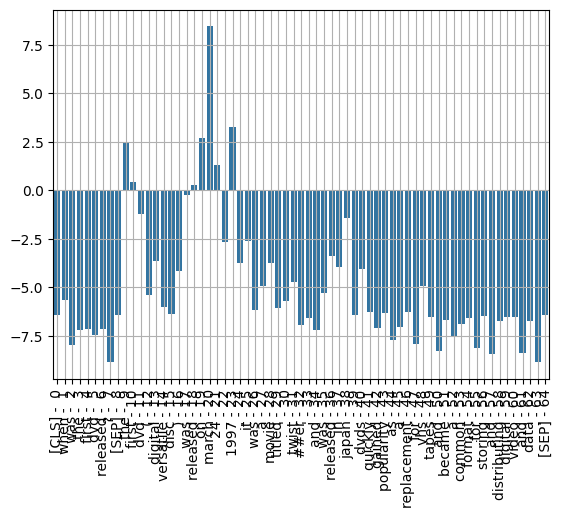

In [ ]:
ax = sns.barplot(x=token_labels, y=s_scores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)

/tmp/ipython-input-365763533.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


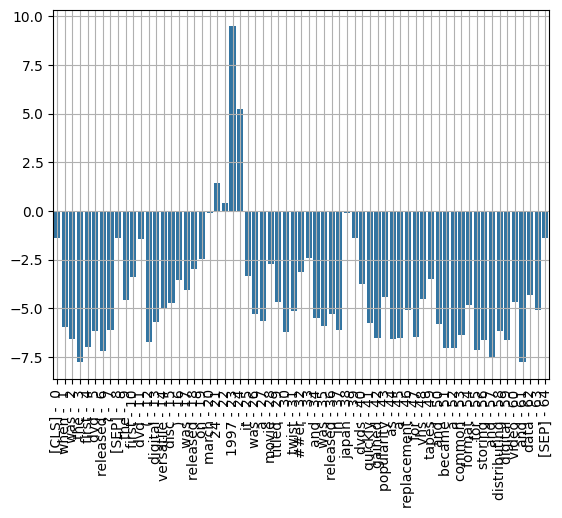

In [ ]:
ax = sns.barplot(x=token_labels, y=e_scores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)

## Creating a QA Bot

In [ ]:
sunset_motors_context = "Sunset Motors is a renowned automobile dealership that has been a cornerstone of the automotive industry since its establishment in 1978. Located in the picturesque town of Crestwood, nestled in the heart of California's scenic Central Valley, Sunset Motors has built a reputation for excellence, reliability, and customer satisfaction over the past four decades. Founded by visionary entrepreneur Robert Anderson, Sunset Motors began as a humble, family-owned business with a small lot of used cars. However, under Anderson's leadership and commitment to quality, it quickly evolved into a thriving dealership offering a wide range of vehicles from various manufacturers. Today, the dealership spans over 10 acres, showcasing a vast inventory of new and pre-owned cars, trucks, SUVs, and luxury vehicles. One of Sunset Motors' standout features is its dedication to sustainability. In 2010, the dealership made a landmark decision to incorporate environmentally friendly practices, including solar panels to power the facility, energy-efficient lighting, and a comprehensive recycling program. This commitment to eco-consciousness has earned Sunset Motors recognition as an industry leader in sustainable automotive retail. Sunset Motors proudly offers a diverse range of vehicles, including popular brands like Ford, Toyota, Honda, Chevrolet, and BMW, catering to a wide spectrum of tastes and preferences. In addition to its outstanding vehicle selection, Sunset Motors offers flexible financing options, allowing customers to secure affordable loans and leases with competitive interest rates."
sunset_motors_context

"Sunset Motors is a renowned automobile dealership that has been a cornerstone of the automotive industry since its establishment in 1978. Located in the picturesque town of Crestwood, nestled in the heart of California's scenic Central Valley, Sunset Motors has built a reputation for excellence, reliability, and customer satisfaction over the past four decades. Founded by visionary entrepreneur Robert Anderson, Sunset Motors began as a humble, family-owned business with a small lot of used cars. However, under Anderson's leadership and commitment to quality, it quickly evolved into a thriving dealership offering a wide range of vehicles from various manufacturers. Today, the dealership spans over 10 acres, showcasing a vast inventory of new and pre-owned cars, trucks, SUVs, and luxury vehicles. One of Sunset Motors' standout features is its dedication to sustainability. In 2010, the dealership made a landmark decision to incorporate environmentally friendly practices, including solar 

In [ ]:
def faq_bot(question):

  context = sunset_motors_context
  input_ids = tokenizer.encode(question, context)
  tokens = tokenizer.convert_ids_to_tokens(input_ids)
  sep_idx = input_ids.index(tokenizer.sep_token_id)
  num_seg_a = sep_idx+1
  num_seg_b = len(input_ids) - num_seg_a
  segment_ids = [0]*num_seg_a + [1]*num_seg_b
  output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
  answer_start = torch.argmax(output.start_logits)
  answer_end = torch.argmax(output.end_logits)

  if answer_end >= answer_start:
    answer = ' '.join(tokens[answer_start:answer_end+1])
  else:
    print("I don't know how to answer this question, can you ask another one?")

  corrected_answer = ''

  for word in answer.split():
    if word[0:2] == "##":
      corrected_answer += word[2:]
    else:
      corrected_answer += ' ' + word

  return corrected_answer



In [ ]:
faq_bot('Where is the dealership located?')

' crestwood'

In [ ]:
faq_bot('what make of cars are available?')

' ford , toyota , honda , chevrolet , and bmw'

In [ ]:
faq_bot("How large is the dealership?")

' 10 acres'

## RoBERTa and DistilBert

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaModel.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

## XLNet

In [ ]:
#!pip install evaluate
import pandas as pd
import numpy as np
from cleantext import clean
import re
from transformers import XLNetTokenizer, XLNetForSequenceClassification, TrainingArguments, Trainer, pipeline
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import datasets
import evaluate
import random

In [ ]:
data_train = pd.read_csv("emotion-labels-test.csv")
data_test = pd.read_csv("emotion-labels-train.csv")
data_val = pd.read_csv("emotion-labels-val.csv")

In [ ]:
data_train.head()

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy


In [ ]:
!pip install --upgrade cleantext

In [ ]:
data = pd.concat([data_train, data_test, data_val], ignore_index=True)

In [ ]:
data['text_clean'] = data['text'].apply(lambda x: clean(x))

In [ ]:
data['text_clean'] = data['text_clean'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [ ]:
data['text_clean'] = data['text_clean'].apply(lambda x: re.sub('@[^\s]+', '', x))

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-149597858.py:1: SyntaxWarning: invalid escape sequence '\s'
  data['text_clean'] = data['text_clean'].apply(lambda x: re.sub('@[^\s]+', '', x))


In [ ]:
data.head(20)

,text,label,text_clean
0,You must be knowing #blithe means (adj.) Happ...,joy,must know blith mean adj happi cheer
1,Old saying 'A #smile shared is one gained for ...,joy,old say smile share one gain anoth day yeglif ...
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy,bridget jone babi bloodi hilari bridgetjonesbabi
3,@Elaminova sparkling water makes your life spa...,joy,elaminova sparkl water make life sparkli
4,I'm tired of everybody telling me to chill out...,joy,im tire everybodi tell chill everyth ok fuck i...
5,#GBBO can cheer me up ☺️,joy,gbbo cheer
6,"&amp; as much as I hate for a dude to cheat, w...",joy,amp much hate dude cheat women forego pleas ma...
7,@GOT7Official @jrjyp happy birthday jin young!...,joy,gotoffici jrjyp happi birthday jin young princ...
8,@GOT7Official @jrjyp happy birthday jin young!...,joy,gotoffici jrjyp happi birthday jin young princ...
9,The race advances only by the extra achievemen...,joy,race advanc extra achiev individu individu cha...


<Axes: xlabel='label'>

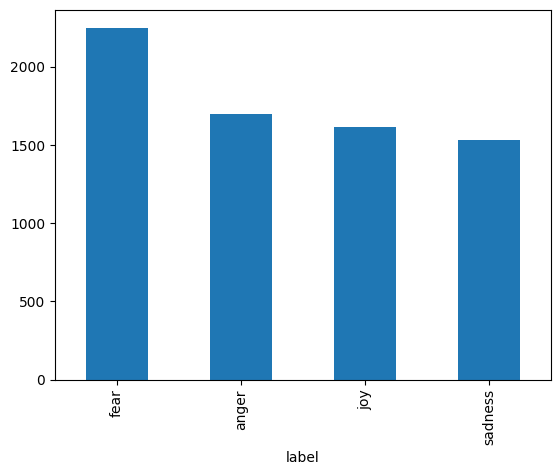

In [ ]:
data['label'].value_counts().plot(kind="bar")

We have to assure that each label has the same amount of data

In [ ]:
g = data.groupby('label')
data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

/tmp/ipython-input-2135407547.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))


<Axes: xlabel='label'>

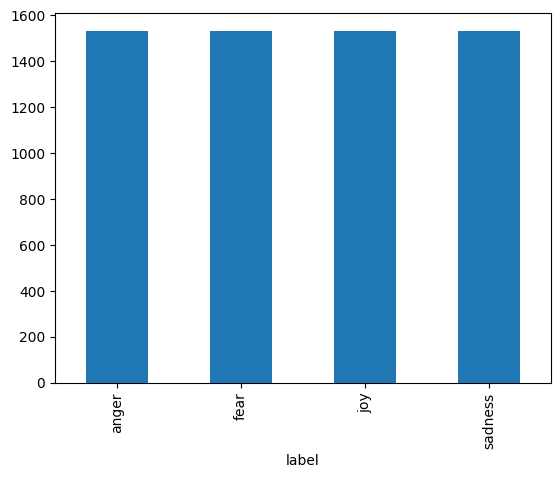

In [ ]:
data['label'].value_counts().plot(kind="bar")

In [ ]:
data.shape

(6132, 3)

Turn the labels into Intengers and specify how many labels that we have

In [ ]:
data['label_int'] = LabelEncoder().fit_transform(data['label'])

In [ ]:
NUM_LABELS = 4

Creating the training and test data

In [ ]:
train_split, test_split = train_test_split(data, train_size=0.8)
train_split, val_split = train_test_split(train_split, train_size=0.9)

In [ ]:
print(len(train_split))
print(len(test_split))
print(len(val_split))

4414
1227
491


Format data into a dataset dictionary

In [ ]:
train_df = pd.DataFrame({
    "label":train_split.label_int.values,
    "text": train_split.text_clean.values
})

test_df = pd.DataFrame({
    "label":test_split.label_int.values,
    "text": test_split.text_clean.values
})

In [ ]:
train_df = datasets.Dataset.from_dict(train_df)
test_df = datasets.Dataset.from_dict(test_df)

In [ ]:
dataset_dict = datasets.DatasetDict({"train":train_df, "test":test_df})

In [ ]:
print(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 4414
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 1227
    })
})


### Create Embeddings

In [ ]:
tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

In [ ]:
def tokenize_function(examples):
  return tokenizer(examples["text"], padding="max_length", max_length=128, truncation=True)

In [ ]:
tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)

Map:   0%|          | 0/4414 [00:00<?, ? examples/s]

Map:   0%|          | 0/1227 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4414
    })
    test: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1227
    })
})

In [ ]:
print(tokenized_datasets["train"]["text"][0])

see huge realli full backpack peopl fill anxieti


In [ ]:
print(tokenized_datasets["train"]["input_ids"][0])

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 197, 1519, 525, 1258, 410, 14559, 17, 1590, 1979, 368, 2619, 48, 6269, 19171, 4, 3]


In [ ]:
tokenizer.decode(5)

'<pad>'

In [ ]:
print(tokenized_datasets["train"]["token_type_ids"][0])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]


In [ ]:
print(tokenized_datasets["train"]["attention_mask"][0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


A sample of the tokenized data set for a training demonstration/learning purposes so it does not take forever

In [ ]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(100))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(100))

-----------------------------------------------------------------------------

### Finetuning the Model

In [ ]:
model = XLNetForSequenceClassification.from_pretrained(
    'xlnet-base-cased',
    num_labels=NUM_LABELS,
    id2label={0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness'}
)

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Specifiy which measure of accurarcy we want the model to evaluate when it's training

In [ ]:
metric = evaluate.load("accuracy") #use whichever method of accuracy that would be best in the specific use case

In [ ]:
def compute_metrics(eval_pred):
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)
  return metric.compute(predictions=predictions, references=labels)

Specify a directory to save our training hyperparemeters

In [ ]:
training_args = TrainingArguments(output_dir="test_trainer", eval_strategy="epoch", num_train_epochs=3)

In [ ]:
trainer = Trainer (
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics
)


In [ ]:
trainer.train()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:wandb: You chose "Don't visualize my results"


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

### Evaluate model

In [ ]:
trainer.evaluate()

Saving the model

In [ ]:
model.save_pretrained("fine_tuned_model")

In [ ]:
fine_tuned_model = XLNetForSequenceClassification.from_pretrained("fine_tuned_model")

In [ ]:
clf = pipeline("text-classifcation", fine-tuned_model, tokenizer=tokenizer)

In [ ]:
rand_int = random(0, len(val_split))
print(val_split[rand_int])
answer = clf(val_split['text_clean'][rand_int], top_k=None)
print(answer)